# Working with APIs

We'll write a program that generates a visualization based on data it retrieves. It will use an API or *application programming interface* to automaticaly request information from a website and use that to generate a visualization.

## Index

* [Using an API](#using-an-api)
    * [Requesting Data using an API call](#requesting-data-using-an-api-call)
    * [Installing Requests](#installing-requests)
    * [Processing an API Response](#processing-an-api-response)
    * [Summarizing the Top Repositories](#summarizing-the-top-repositories)
* [Visualizing Repositories Using Plotly](#visualizing-repositories-using-plotly)
* [Hacker News API](#hacker-news-api)
* [Working with API's Exercises](#working-with-apis-exercises)
* [Schematic Summary](#schematic-summary)

## Using an API

We'll write a program to download information about th emost-starred Python projects on GitHub, and we'll create a visualization with this information.

### Requesting Data Using an API Call

This is what an API call looks like, inside the link you can see the response:<br>
https://api.github.com/search/repositories?q=language:python+sort:stars 

- *https://api.github.com/* directs the request to GitHub's API.
- *search/repositories/* conducts the search through all the repositories.
- *?* means that later we are going to pass an argument.
- *q=* the equal lets us begin specifying a query.
- *language:python* we specified repositories that have Python as primary language.
- *+sort:stars* sorts the prohect by the number of stars.

### Installing Requests

We need the `Requests` package to easily request information from a website and examine the response.
```python
python -m pip install --user requests
```

### Processing an API Response


In [4]:
import requests

## API call
url = "https://api.github.com/search/repositories?q=language:python+stars:>10000&sort=stars&order=desc"

response = requests.get(url) # Making the call

if response.status_code == 200:
    print(f"Request succesfull! Code: {response.status_code}")
else:
    print(f"Something go wrong... Status code: {response.status_code}")

# Convert the response to a dictionary
data = response.json()

# Process resuts
print(data.keys())

Request succesfull! Code: 200
dict_keys(['total_count', 'incomplete_results', 'items'])


### Working with the Response Dictionary


In [9]:
import requests

## API call
url = "https://api.github.com/search/repositories?q=language:ruby+stars:>10000&sort=stars&order=desc"

response = requests.get(url) # Making the call

if response.status_code == 200:
    print(f"Request succesfull! Code: {response.status_code}")
else:
    print(f"Something go wrong... Status code: {response.status_code}")

# Convert the response to a dictionary
data = response.json()

print(f"Total repositories: {data['total_count']}")
print(f"Complete results: {not data['incomplete_results']}") 
# With incomplete_results we know if github was able to fully process the query

# Information about the repositories
repo_datas = data['items'] # items is a list with the number of repositories
print(f"Repositories returned: {len(repo_datas)}")

## Examine first repo
repo_data = repo_datas[0]
#print(f"\nKeys: {len(repo_data)}")
#for key in sorted(repo_data.keys()):
#    print(key)

# Extracting more detailed info:
print("\nSelected information about first repository:")
print(f"Name: {repo_data['name']}")
print(f"Owner: {repo_data['owner']['login']}")
print(f"Stars: {repo_data['stargazers_count']}")
print(f"Repository: {repo_data['html_url']}")
print(f"Created: {repo_data['created_at']}")
print(f"Updated: {repo_data['updated_at']}")
print(f"Description: {repo_data['description']}")

Request succesfull! Code: 200
Total repositories: 39
Complete results: True
Repositories returned: 30

Selected information about first repository:
Name: rails
Owner: rails
Stars: 54980
Repository: https://github.com/rails/rails
Created: 2008-04-11T02:19:47Z
Updated: 2024-05-21T14:58:17Z
Description: Ruby on Rails


### Summarizing the Top Repositories

In [6]:
import requests

## API call
url = "https://api.github.com/search/repositories?q=language:python+stars:>10000&sort=stars&order=desc"

response = requests.get(url) # Making the call

if response.status_code == 200:
    print(f"Request succesfull! Code: {response.status_code}")
else:
    print(f"Something go wrong... Status code: {response.status_code}")

# Convert the response to a dictionary
data = response.json()

print(f"Total repositories: {data['total_count']}")
print(f"Complete results: {not data['incomplete_results']}") 

# Information about the repositories
repo_datas = data['items']
print(f"Repositories returned: {len(repo_datas)}")

# Extracting more detailed info:
print("\n\tSelected information about each repository")
for repo_data in repo_datas[:9]:
    print("\nSelected information about first repository:")
    print(f"Name: {repo_data['name']}")
    print(f"Owner: {repo_data['owner']['login']}")
    print(f"Stars: {repo_data['stargazers_count']}")
    print(f"Repository: {repo_data['html_url']}")
    print(f"Created: {repo_data['created_at']}")
    print(f"Updated: {repo_data['updated_at']}")
    print(f"Description: {repo_data['description']}")

Request succesfull! Code: 200
Total repositories: 493
Complete results: True
Repositories returned: 30

	Selected information about each repository

Selected information about first repository:
Name: public-apis
Owner: public-apis
Stars: 294219
Repository: https://github.com/public-apis/public-apis
Created: 2016-03-20T23:49:42Z
Updated: 2024-05-21T15:14:57Z
Description: A collective list of free APIs

Selected information about first repository:
Name: system-design-primer
Owner: donnemartin
Stars: 257869
Repository: https://github.com/donnemartin/system-design-primer
Created: 2017-02-26T16:15:28Z
Updated: 2024-05-21T15:15:19Z
Description: Learn how to design large-scale systems. Prep for the system design interview.  Includes Anki flashcards.

Selected information about first repository:
Name: awesome-python
Owner: vinta
Stars: 207439
Repository: https://github.com/vinta/awesome-python
Created: 2014-06-27T21:00:06Z
Updated: 2024-05-21T15:15:45Z
Description: An opinionated list of aweso

## Visualizing Repositories Using Plotly


Request succesfull! Code: 200
Complete results: True


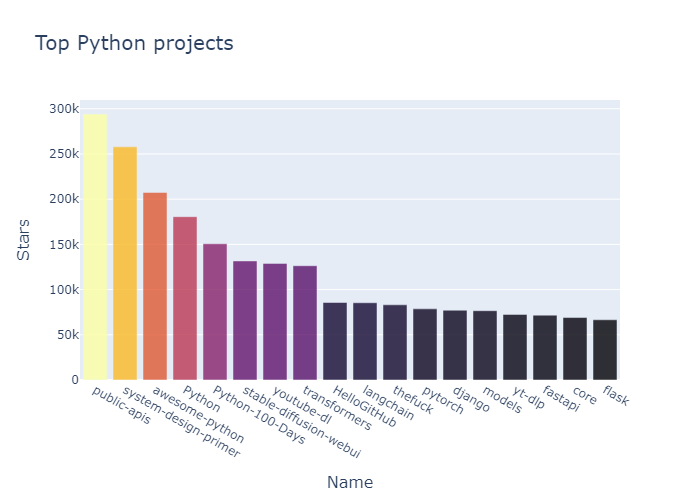

In [1]:
import requests
import plotly.express as px
from IPython.display import display, Image

## API call
url = "https://api.github.com/search/repositories?q=language:python+stars:>65000&sort=stars&order=desc"

response = requests.get(url)

# Checking Status Code
if response.status_code == 200:
    print(f"Request succesfull! Code: {response.status_code}")
else:
    print(f"Something go wrong... Status code: {response.status_code}")

# Process results
data = response.json()
print(f"Complete results: {not data['incomplete_results']}")

# Process information. Name to repo-link and hover with description.
repo_datas = data["items"]
repo_names = [f"<a href='{repo_data['html_url']}'>{repo_data['name']}</a>" for repo_data in repo_datas]
repo_stars = [repo_data["stargazers_count"] for repo_data in repo_datas]

# Hover Text
hover_texts = [f"{repo_data['owner']['login']} <br />{repo_data['description']}" for repo_data in repo_datas]

# Visualization
title = "Top Python projects"
labels = {"x":"Name","y":"Stars"}
fig = px.bar(x=repo_names, y=repo_stars, labels=labels, title=title, hover_name=hover_texts)

fig.update_layout(title_font_size=20, xaxis_title_font_size=16, yaxis_title_font_size=16)
fig.update_traces(marker_color=repo_stars, marker_colorscale="inferno", marker_opacity=0.8)

#fig.show()
Image(fig.to_image(format='png'))

## Hacker News API



In [20]:
import requests 
import json 

# API Call
url = "https://hacker-news.firebaseio.com/v0/item/31353677.json"
data = requests.get(url)

# Checking Status Code
if response.status_code == 200:
    print(f"Request succesfull! Code: {response.status_code}")
else:
    print(f"Something go wrong... Status code: {response.status_code}")

# Exploring structure
response_dict = data.json()
response_string = json.dumps(response_dict, indent=4)
print(response_string)

Request succesfull! Code: 200
{
    "by": "sohkamyung",
    "descendants": 307,
    "id": 31353677,
    "kids": [
        31354987,
        31354235,
        31354040,
        31358602,
        31354201,
        31354991,
        31354315,
        31353775,
        31353925,
        31354169,
        31354273,
        31354437,
        31356902,
        31358694,
        31363418,
        31353862,
        31357186,
        31356379,
        31356826,
        31355085,
        31369435,
        31357936,
        31354142,
        31354213,
        31356311,
        31357865,
        31353929,
        31364954,
        31354621,
        31356002,
        31356407,
        31355491,
        31359235,
        31356053,
        31354347,
        31355326,
        31354703,
        31353802
    ],
    "score": 786,
    "time": 1652361401,
    "title": "Astronomers reveal first image of the black hole at the heart of our galaxy",
    "type": "story",
    "url": "https://public.nrao.edu/news/

In [4]:
from operator import itemgetter 
import requests 

# API call
url = "https://hacker-news.firebaseio.com/v0/topstories.json"
data = requests.get(url)

# Checking Status Code
if response.status_code == 200:
    print(f"Request succesfull! Code: {response.status_code}")
else:
    print(f"Something go wrong... Status code: {response.status_code}")

submission_ids = data.json()

submission_dicts = []
for submission_id in submission_ids[:5]:
    # New API call for each submission
    url = f"https://hacker-news.firebaseio.com/v0/item/{submission_id}.json"
    r = requests.get(url)
    print(f"id: {submission_id}\tstatus: {r.status_code}")
    response_dict = r.json()

    # Build diccionary for each article
    submission_dict = {
        'title': response_dict['title'],
        'hn_link': f"https://news.ycombinator.com/item?id={submission_id}",
        'comments': response_dict['descendants'],
    }
    submission_dicts.append(submission_dict)

# Sort with 'itemgetter' by the number of comments in reverse order
submission_dicts = sorted(submission_dicts, key=itemgetter('comments'), reverse=True)

for submission_dict in submission_dicts:
    print(f"\nTitle: {submission_dict['title']}")
    print(f"Discussion link: {submission_dict['hn_link']}")
    print(f"Comments: {submission_dict['comments']}")


Request succesfull! Code: 200
id: 40428386	status: 200
id: 40429326	status: 200
id: 40427973	status: 200
id: 40429200	status: 200
id: 40426442	status: 200

Title: What UI density means and how to design for it
Discussion link: https://news.ycombinator.com/item?id=40428386
Comments: 30

Title: Gifski: Optimized GIF Encoder
Discussion link: https://news.ycombinator.com/item?id=40426442
Comments: 27

Title: 40-Year old BASICA utility code for teaching
Discussion link: https://news.ycombinator.com/item?id=40427973
Comments: 11

Title: Show HN: I built a game to help you learn neural network architectures
Discussion link: https://news.ycombinator.com/item?id=40429200
Comments: 2

Title: Anthropic: Mapping the Mind of a Large Language Model
Discussion link: https://news.ycombinator.com/item?id=40429326
Comments: 1


## Working with API's Exercises

Try another visualization with diferent languajes using GitHub's API. Be creative.

In [12]:
import requests
import plotly.express as px
from IPython.display import display, Image

## API call
languages = ["python", "ruby", "javascript", "java", "go", "csharp"]
data_count = []
for language in languages:
    url = f"https://api.github.com/search/repositories?q=language:{language}+stars:>10000&sort=stars&order=desc"
    response = requests.get(url)

    # Checking Status Code
    if response.status_code == 200:
        print(f"Request succesfull for {language}! Code: {response.status_code}")
    else:
        print(f"Something go wrong for {language}... Status code: {response.status_code}")

    if language == "python":
        data_python = response.json()
        print(f"\nComplete results {language}: {not data_python['incomplete_results']}")
        #print(f"Total repositories: {data_python['total_count']}")
        data_count.append(data_python['total_count'])
    elif language == "ruby":
        data_ruby = response.json()
        print(f"\nComplete results {language}: {not data_ruby['incomplete_results']}")
        #print(f"Total repositories: {data_ruby['total_count']}")
        data_count.append(data_ruby['total_count'])
    elif language == "javascript":
        data_js = response.json()
        print(f"\nComplete results {language}: {not data_js['incomplete_results']}")
        #print(f"Total repositories: {data_js['total_count']}")
        data_count.append(data_js['total_count'])
    elif language == "java":
        data_java = response.json()
        print(f"\nComplete results {language}: {not data_java['incomplete_results']}")
        #print(f"Total repositories: {data_java['total_count']}")
        data_count.append(data_java['total_count'])
    elif language == "go":
        data_go = response.json()
        print(f"\nComplete results {language}: {not data_go['incomplete_results']}")
        #print(f"Total repositories: {data_go['total_count']}")
        data_count.append(data_go['total_count'])
    elif language == "csharp":
        data_cs = response.json()
        print(f"\nComplete results {language}: {not data_cs['incomplete_results']}")
        #print(f"Total repositories: {data_cs['total_count']}")
        data_count.append(data_cs['total_count'])


# Visualization
title = "Top projects over 10k stars"
#labels = {"x":"Name","y":"Stars"}
fig = px.pie(values=data_count, names=languages, title=title, width=1024, height=720,
             labels={
                "values":"Repositores",
                "names":"Languages",
             },
             )

fig.update_layout(title_font_size=20)

fig.show()
#Image(fig.to_image(format='png'))

Request succesfull for python! Code: 200

Complete results python: True
Request succesfull for ruby! Code: 200

Complete results ruby: True
Request succesfull for javascript! Code: 200

Complete results javascript: True
Request succesfull for java! Code: 200

Complete results java: True
Request succesfull for go! Code: 200

Complete results go: True
Request succesfull for csharp! Code: 200

Complete results csharp: True


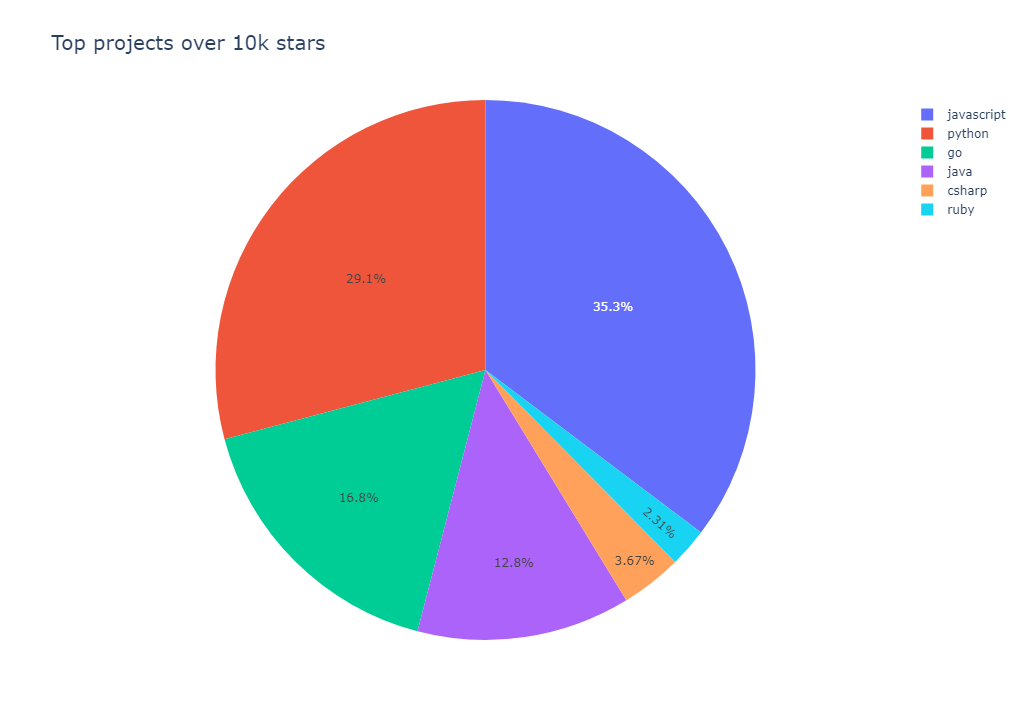

## Schematic Summary

We used:
```python
# To make API call
import requests
# Working with json
import json
# Plotly visualizations
import plotly.express as px
# To see the visualization from plotly as an image
from IPython.display import display, Image
```
### Basic sintaxis:
First, we generate a variable with the url for the API and we use the module `requests` and `get()` function to make the call.
```python
url = "https://hacker-news.firebaseio.com/v0/topstories.json"
data = requests.get(url)
```
It's useful to know if `data.status_code` is 200, the request was succesfull.<br>
Later, we read this data with `data.json()`. We can print the variable under `data.json()` to see the dictionary, but we can let it format with `json.dumps(data, indent=4)` and then print it, it will be eseable to read. Note that whatever is inside `items:` is the downloaded data. 
```python
data_dict = data.json()
data_print = json.dumps(data_dict, indent=4)
```
We can print the first item to see what headers it has and know what we can explore further.
```python
data_items = data_dict['items']
print(f"Total items: {len(data_items)}")
data_item = data_items[0]
data_item = json.dumps(data_item, indent=4)
print(f"First item data: \n{data_item}")
```
